In [1]:
import pandas as pd;
from scipy.stats import zscore
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

df = pd.read_csv('../data/sierraleone-bumbuna.csv')

print("📊 Summary Statistics (Numeric Columns):")
print(df.describe())


📊 Summary Statistics (Numeric Columns):
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000

In [2]:
import sys
!{sys.executable} -m pip install windrose

In [3]:
missing_counts = df.isna().sum()
print("\n📉 Missing Values Per Column:")
print(missing_counts)


📉 Missing Values Per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [4]:
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 📉 Step 1: Missing values
print("\n🔍 Missing values before cleaning:")
print(df[target_cols].isna().sum())

# 🚨 Step 2: Z-score for outlier detection
z_scores = df[target_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

print("\n🚨 Outlier count (|Z| > 3):")
print(outliers.sum())

# Optional: Flag outliers (you can drop or investigate later)
df['has_outlier'] = outliers.any(axis=1)

# -----------------------------
# 🧹 Step 3: Handle missing values — impute with median
for col in target_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# (Optional) You could also remove rows with too many missing/outliers

# -----------------------------
# ✅ Step 4: Drop helper column
df.drop(columns=['has_outlier'], inplace=True)

# -----------------------------
# 💾 Step 5: Export cleaned DataFrame
output_path = '../data/sierraleone_clean.csv'

df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned data saved to: {output_path}")


🔍 Missing values before cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

🚨 Outlier count (|Z| > 3):
GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


C:\Users\surap\AppData\Local\Temp\ipykernel_21700\4121810204.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\surap\AppData\Local\Temp\ipykernel_21700\4121810204.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example


✅ Cleaned data saved to: ../data/sierraleone_clean.csv


In [5]:
# Load cleaned data
df = pd.read_csv('../data/sierraleone_clean.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df.set_index('Timestamp', inplace=True)

<Figure size 1400x600 with 0 Axes>

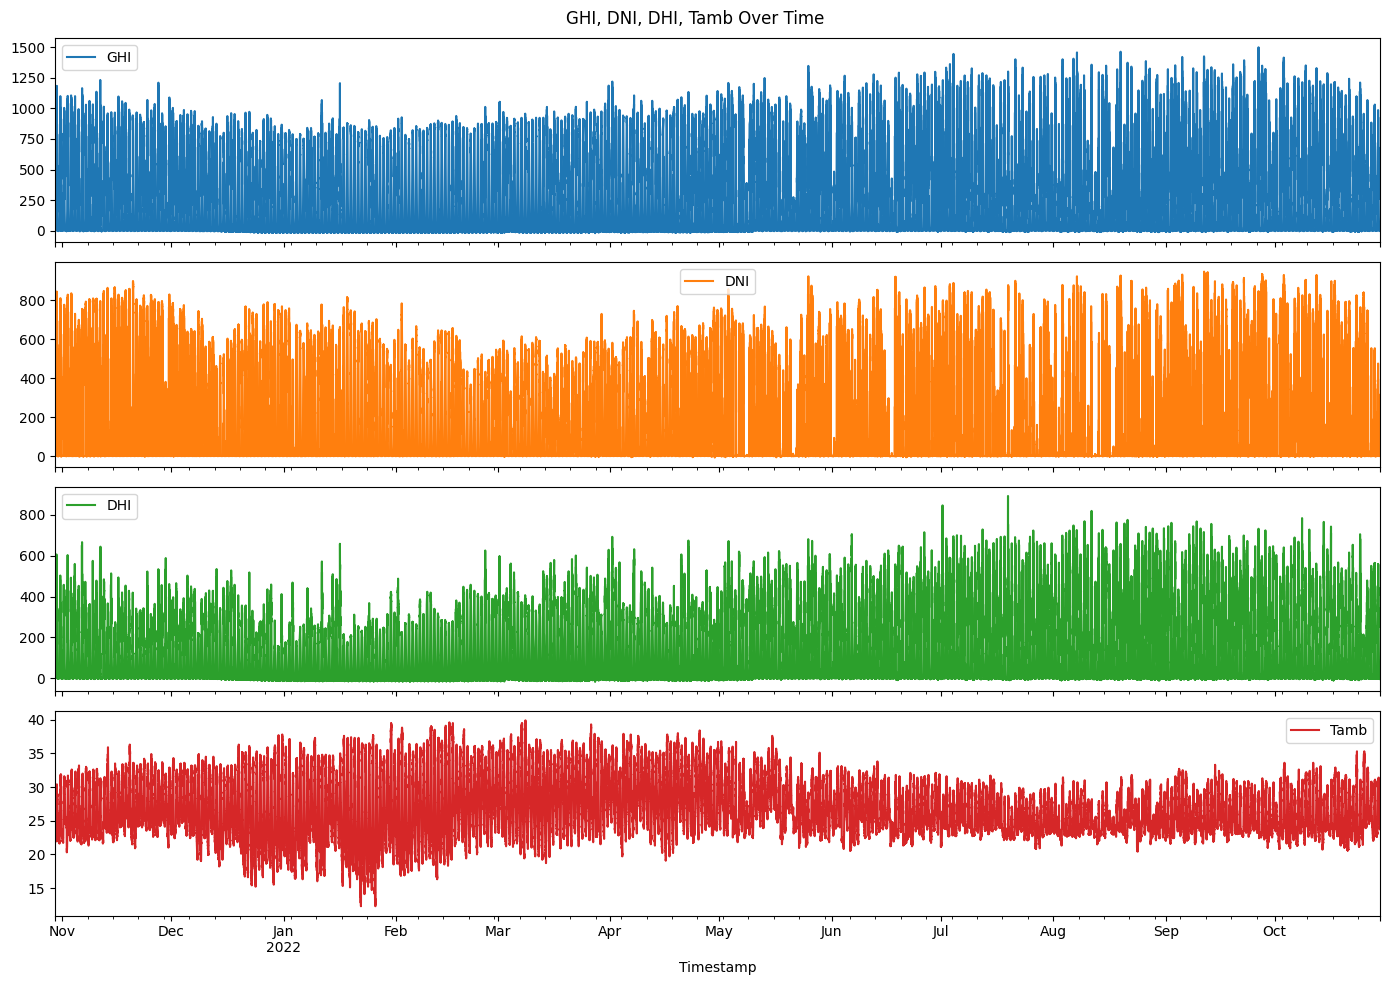

In [6]:
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(14, 10), title='GHI, DNI, DHI, Tamb Over Time')
plt.tight_layout()
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_21700\2630992634.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


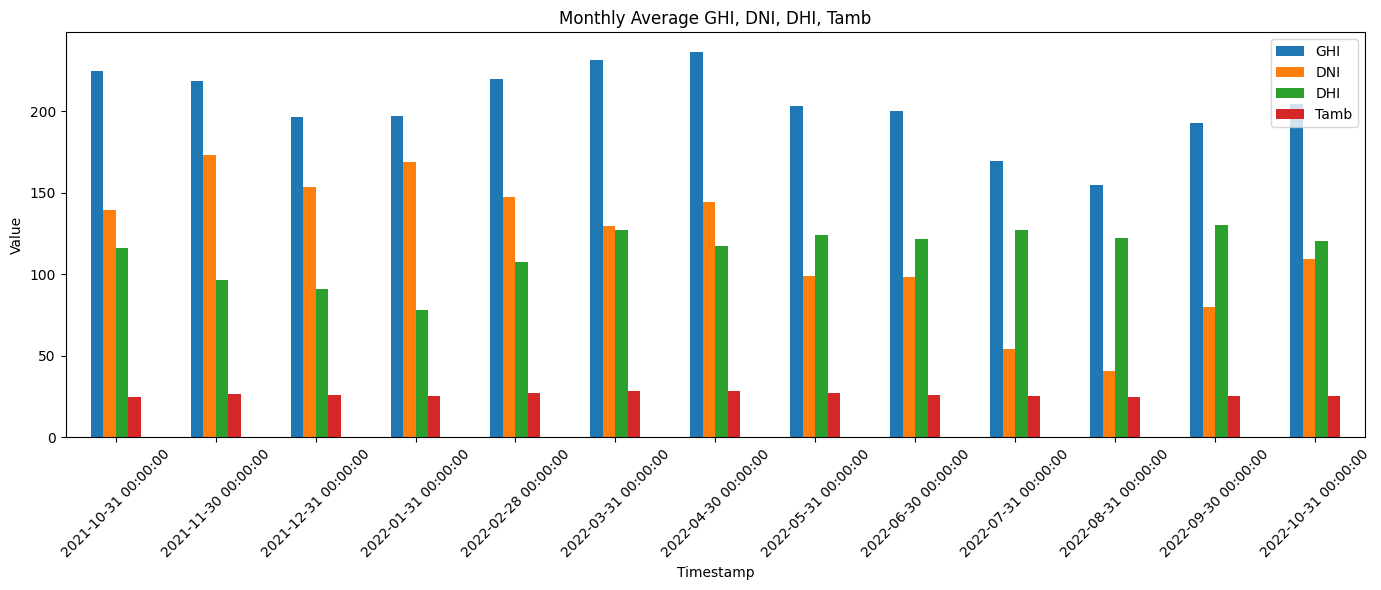

In [7]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set it as index (only if not already set)
# df.set_index('Timestamp', inplace=True)
monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(14, 6), title='Monthly Average GHI, DNI, DHI, Tamb')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_21700\3002828410.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


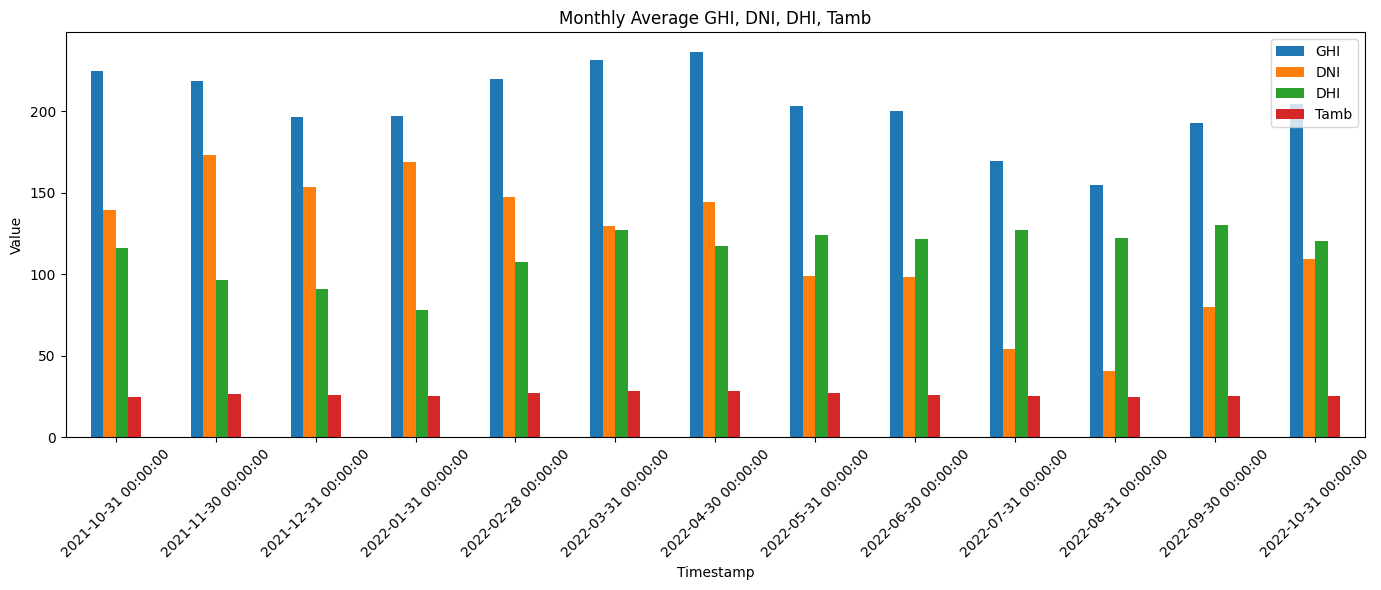

In [8]:
monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(14, 6), title='Monthly Average GHI, DNI, DHI, Tamb')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

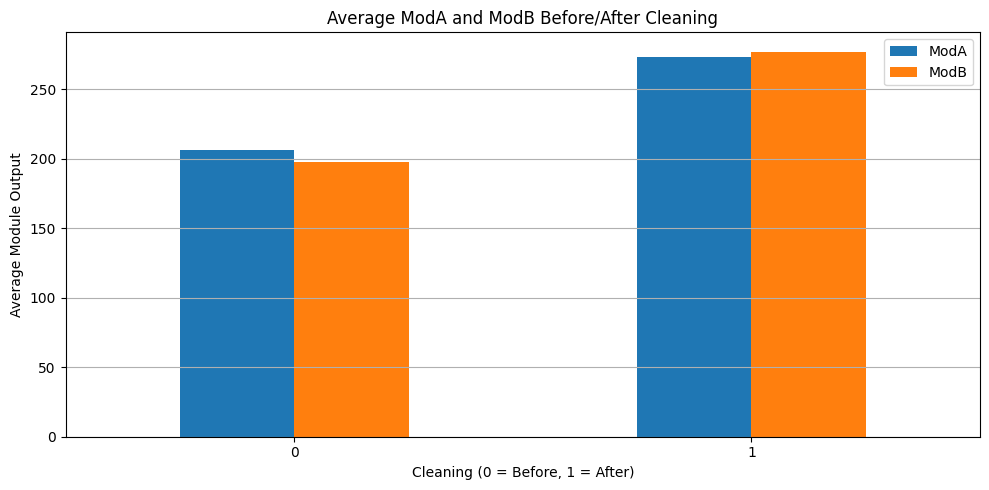

In [13]:
# Group by Cleaning flag
cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting
cleaning_avg.plot(kind='bar', figsize=(10, 5), title='Average ModA and ModB Before/After Cleaning')

plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Module Output')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


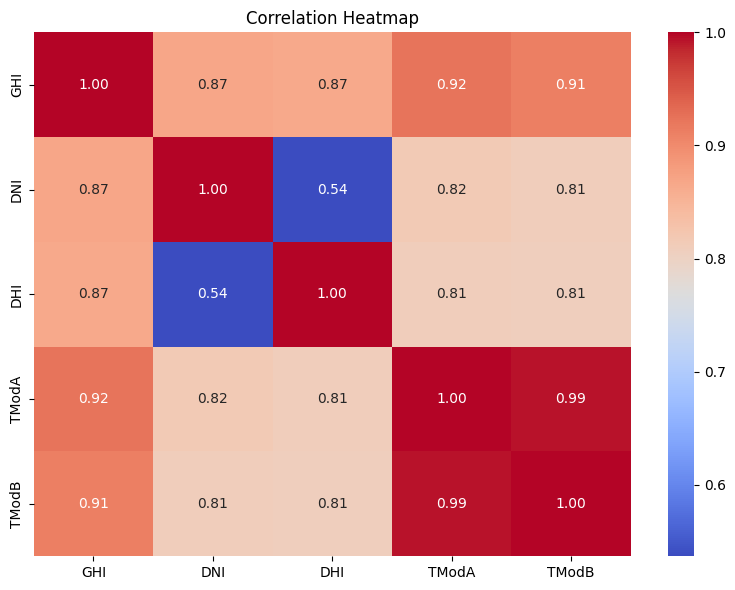

In [14]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

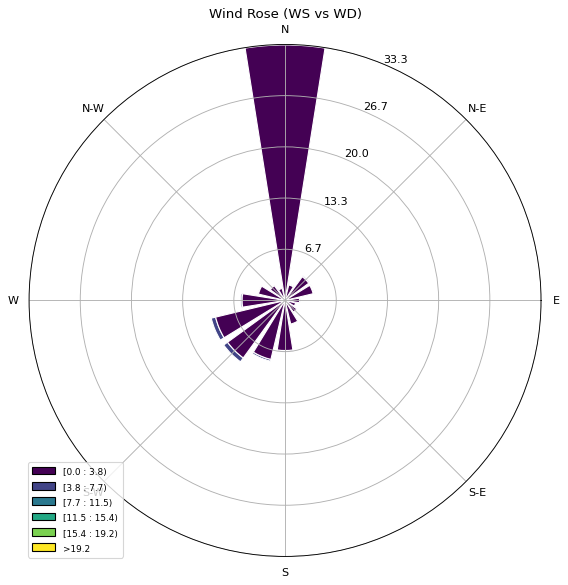

In [15]:
# Create Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (WS vs WD)')
plt.show()

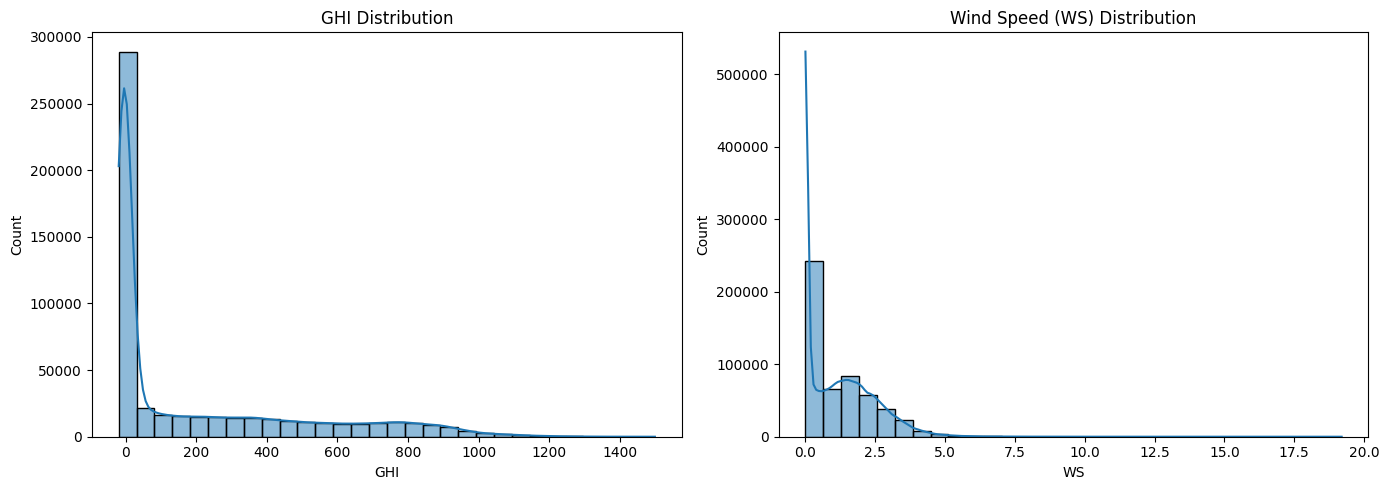

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('GHI Distribution')

# WS Histogram
sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Wind Speed (WS) Distribution')

plt.tight_layout()
plt.show()

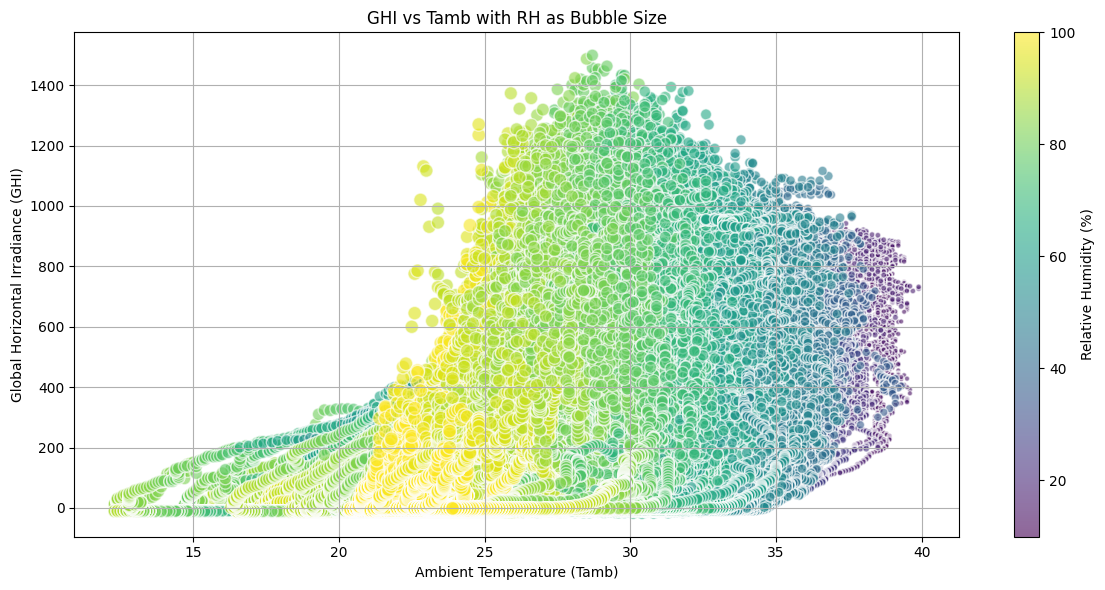

In [17]:
plt.figure(figsize=(12, 6))
bubble = plt.scatter(
    df['Tamb'],       # X-axis: Temperature
    df['GHI'],        # Y-axis: Solar Irradiance
    s=df['RH'],       # Bubble size: Relative Humidity
    c=df['RH'],       # Color (optional): Relative Humidity
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs Tamb with RH as Bubble Size')
plt.colorbar(bubble, label='Relative Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
